In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dp = 'data/Tinder.csv'
df = pd.read_csv(dp,header=0)
df.head()

-Need to do a sort of sentiment analysis like with word vectorization
-Load in other data things


In [ ]:
tinder_data = df[['title', 'score', 'comms_num', 'body', 'timestamp']]
tinder_data.iloc[5]

https://www.kaggle.com/code/mehmetlaudatekman/tutorial-word-embeddings-with-svm

In [38]:
shower_dp = 'data/showerThoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN


In [29]:
shower_data.columns

Index(['created_utc', 'score', 'domain', 'id', 'title', 'ups', 'downs',
       'num_comments', 'permalink', 'selftext', 'link_flair_text', 'over_18',
       'thumbnail', 'subreddit_id', 'edited', 'link_flair_css_class',
       'author_flair_css_class', 'is_self', 'name', 'url', 'distinguished'],
      dtype='object')

In [39]:
shower_data = shower_data.drop(['domain', 'id','permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'thumbnail', 'name', 'url', 'link_flair_text','distinguished'], axis='columns')
shower_data.columns

Index(['created_utc', 'score', 'title', 'ups', 'downs', 'num_comments',
       'selftext', 'subreddit_id', 'edited', 'is_self'],
      dtype='object')

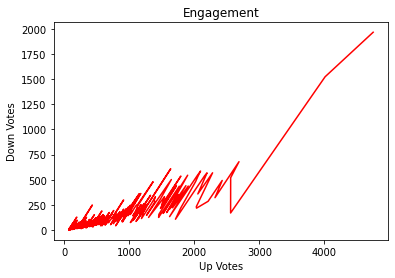

In [40]:
plt.plot(shower_data['ups'], shower_data['downs'],color="r")
plt.xlabel("Up Votes")
plt.ylabel("Down Votes")
plt.title("Engagement")
plt.show()

In [51]:
features = shower_data[['created_utc', 'score', 'title', 'downs', 'num_comments',
       'selftext', 'subreddit_id', 'edited', 'is_self']]
targets = shower_data['ups']


X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [58]:
import nltk
from nltk.tokenize import word_tokenize

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/DAVIDSON/hakanjian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
trial = shower_data['title']
tokens = trial.apply(lambda x: word_tokenize(x))
#tokenizing all of the 'title' column, need to now vectorize them// word embeddings

0      [If, Hillary, Clinton, wins, in, 2016, ,, it, ...
1      [I, am, just, a, penis, ., The, rest, of, me, ...
2      [A, TV, channel, where, all, the, shows, are, ...
3      [If, the, oldest, person, on, earth, is, 116, ...
4      [If, Kanye, and, Kim, 's, child, 's, name, is,...
                             ...                        
995    [Deaf, people, using, captions, to, watch, TV,...
996    [I, wonder, how, much, ink, I, 've, saved, thr...
997    [Everyone, I, 've, ever, known, has, probably,...
998    [Would, n't, it, be, more, logical, to, restar...
999    [When, my, cat, watches, me, on, the, toilet, ...
Name: title, Length: 1000, dtype: object